In [11]:
# %matplotlib inline
import datetime
import os
import seaborn as sns

from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.losses import MeanSquaredError
import tensorflow as tf

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [12]:
import matplotlib.colors as colors

def Model(m, w):
    H, W, L = m.shape
    m = m.T
    c = ["#D1FEFE", "#D1FEFE", "#00FEF9", "#00FDFE", "#50FB7F", "#D3F821", "#FFDE00", "#FF9D00", "#F03A00", "#E10000"]
    x, y, z = np.indices((L, W, H))
    model = (x < 0) & (y < 0) & (z < 0)
    color = np.empty(m.shape, dtype=object)
    for i in range(L):
        for j in range(W):
            for k in range(H):
                if m[i][j][k] >= w:
                    cube = (x > i-1) & (x <= i)& (y > j-1) & (y <= j) & (z > k-1) & (z <= k)
                    color[cube] = c[int(round(10*m[i][j][k]))-1]
                    model = model | cube

    fig = plt.figure(figsize = (20, 10))
    ax = fig.add_axes(Axes3D(fig))
    ax.voxels(model, facecolors=color, edgecolors='w', linewidth=0.5)

    plt.xticks(np.arange(L+1), ['-400']+[" "]*31+['0']+[" "]*31+['400'])
    ax.set_xlabel('Easting (m)', labelpad=20)
    plt.yticks(np.arange(W+1), ['-400']+[" "]*31+['0']+[" "]*31+['400'])
    ax.set_ylabel('Northing (m)', labelpad=15)
    ax.set_zticks(np.arange(H+1))
    ax.set_zticklabels(['0']+[" "]*15+['200']+[" "]*15+['400'])
    ax.set_zlabel('Depth (m)')
    ax.invert_zaxis()
    plt.show()

def colormap():
    cdict = ["#F2F2F2", "#D1FEFE", "#00FEF9", "#00FDFE", "#50FB7F", "#D3F821", "#FFDE00", "#FF9D00", "#F03A00", "#E10000"]
    return colors.ListedColormap(cdict, 'indexed')

def plot_xoy(model, index, factor=0.1, ylabel=True):
    ax = plt.gca()
    model = np.where(model>factor, model, 0)
    plt.imshow(model[:, :, index].T, cmap=colormap())
    ax.invert_yaxis()
    plt.xticks(np.arange(0, 65, 32), ('-400', '0', '400'))
    plt.xlabel('Easting (km)')
    plt.yticks(np.arange(0, 65, 32), ('-400', '0', '400'))
    if ylabel:
        plt.ylabel('Northing (km)')
    plt.tick_params(bottom=False, top=False, left=False, right=False)

In [13]:
X_test = np.load("data/test_model_data.npy")
y_test = np.load("data/test_model_label.npy")

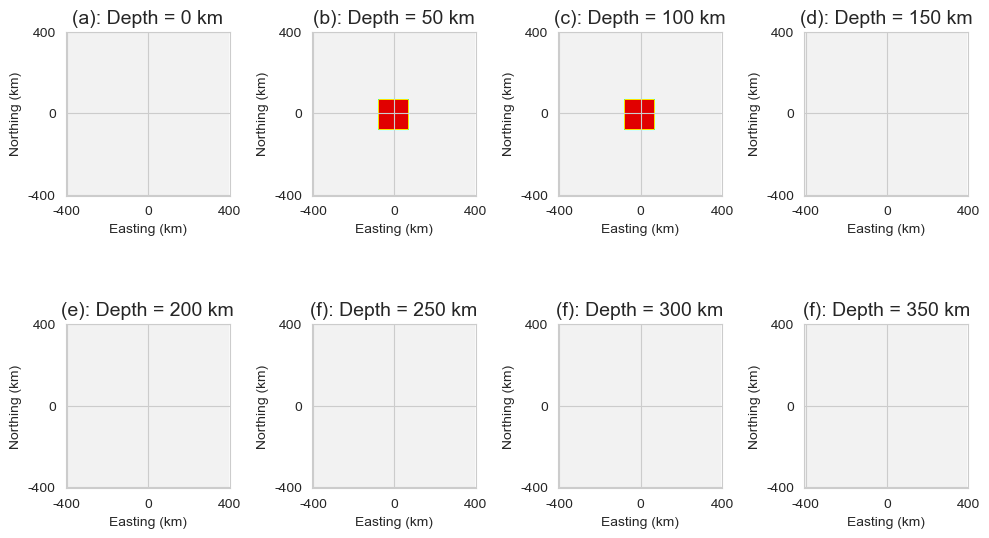

In [14]:
idx = 0
# plt.rc('font',family = 'Times New Roman', size = 14)
indexes = [0, 4, 8, 12, 16, 20, 24, 28]
plt.figure(figsize = (10, 6))
plt.subplot(241)
plot_xoy(np.around(y_test[idx], decimals=1), indexes[0])
plt.title("(a): Depth = 0 km", fontsize=14)
plt.subplot(242)
plot_xoy(np.around(y_test[idx], decimals=1), indexes[1])
plt.title("(b): Depth = 50 km", fontsize=14)
plt.subplot(243)
plot_xoy(np.around(y_test[idx], decimals=1), indexes[2])
plt.title("(c): Depth = 100 km", fontsize=14)
plt.subplot(244)
plot_xoy(np.around(y_test[idx], decimals=1), indexes[3])
plt.title("(d): Depth = 150 km", fontsize=14)
plt.subplot(245)
plot_xoy(np.around(y_test[idx], decimals=1), indexes[4])
plt.title("(e): Depth = 200 km", fontsize=14)
plt.subplot(246)
plot_xoy(np.around(y_test[idx], decimals=1), indexes[5])
plt.title("(f): Depth = 250 km", fontsize=14)
plt.subplot(247)
plot_xoy(np.around(y_test[idx], decimals=1), indexes[6])
plt.title("(f): Depth = 300 km", fontsize=14)
plt.subplot(248)
plot_xoy(np.around(y_test[idx], decimals=1), indexes[7])
plt.title("(f): Depth = 350 km", fontsize=14)
plt.tight_layout()
# plt.savefig(os.path.join(model_dir, "real_2d_{}".format(idx)))
plt.show()

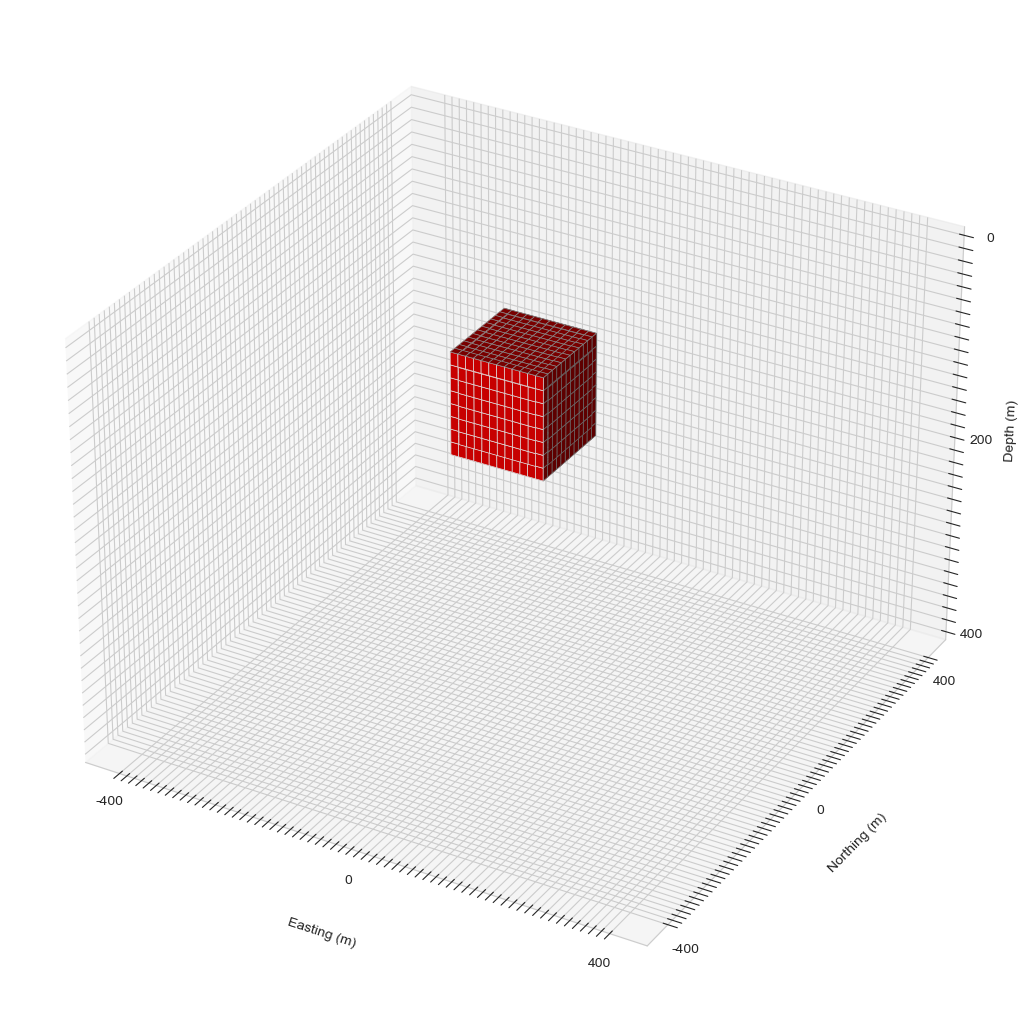

In [15]:
Model(np.transpose(y_test[0], (2, 0, 1)), 0.5)

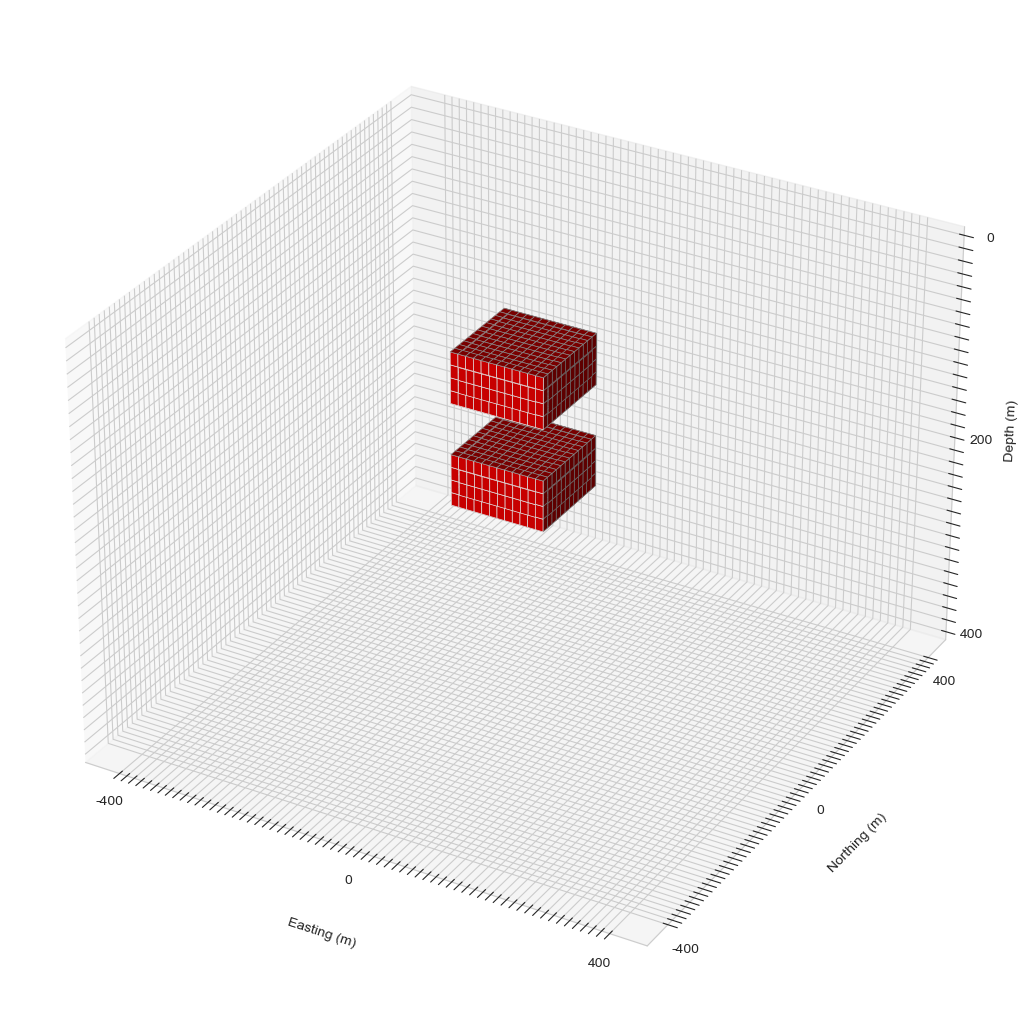

In [16]:
Model(np.transpose(y_test[1], (2, 0, 1)), 0.5)

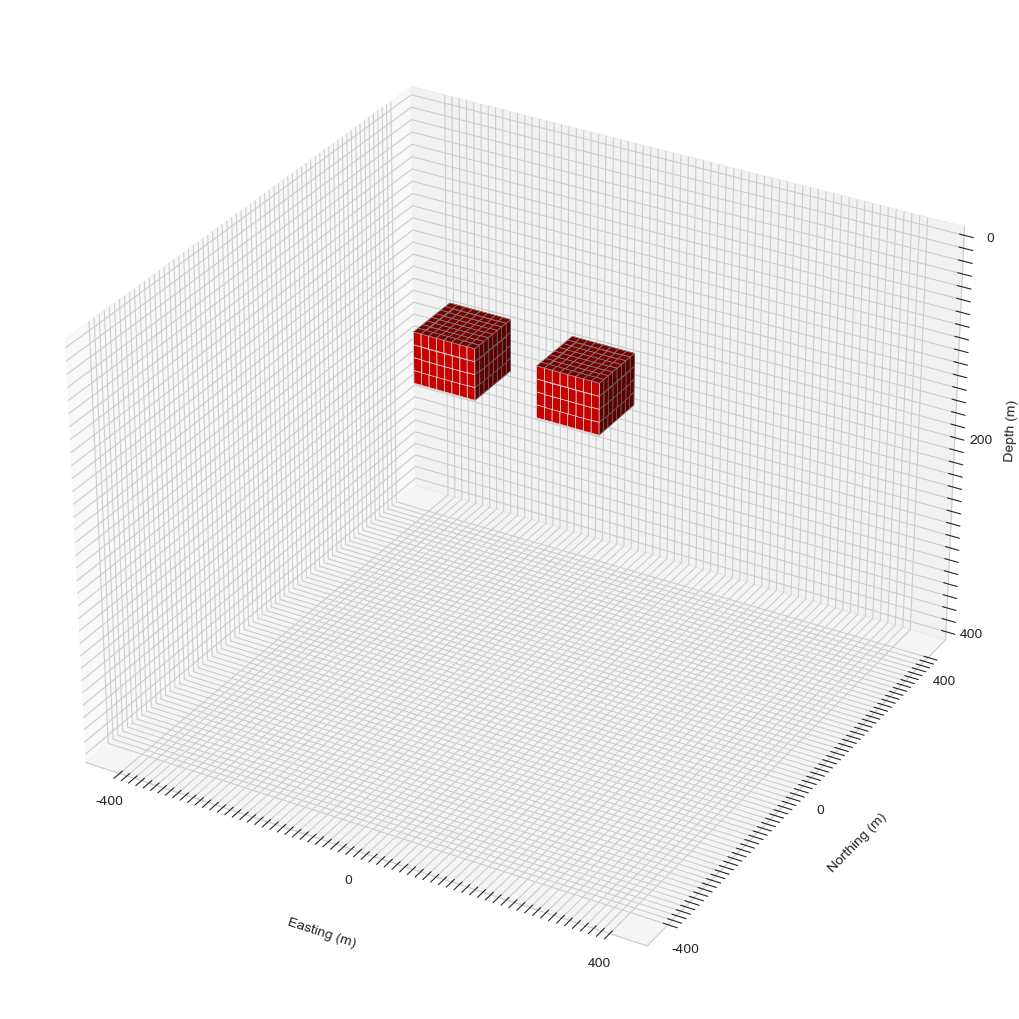

In [17]:
Model(np.transpose(y_test[2], (2, 0, 1)), 0.5)

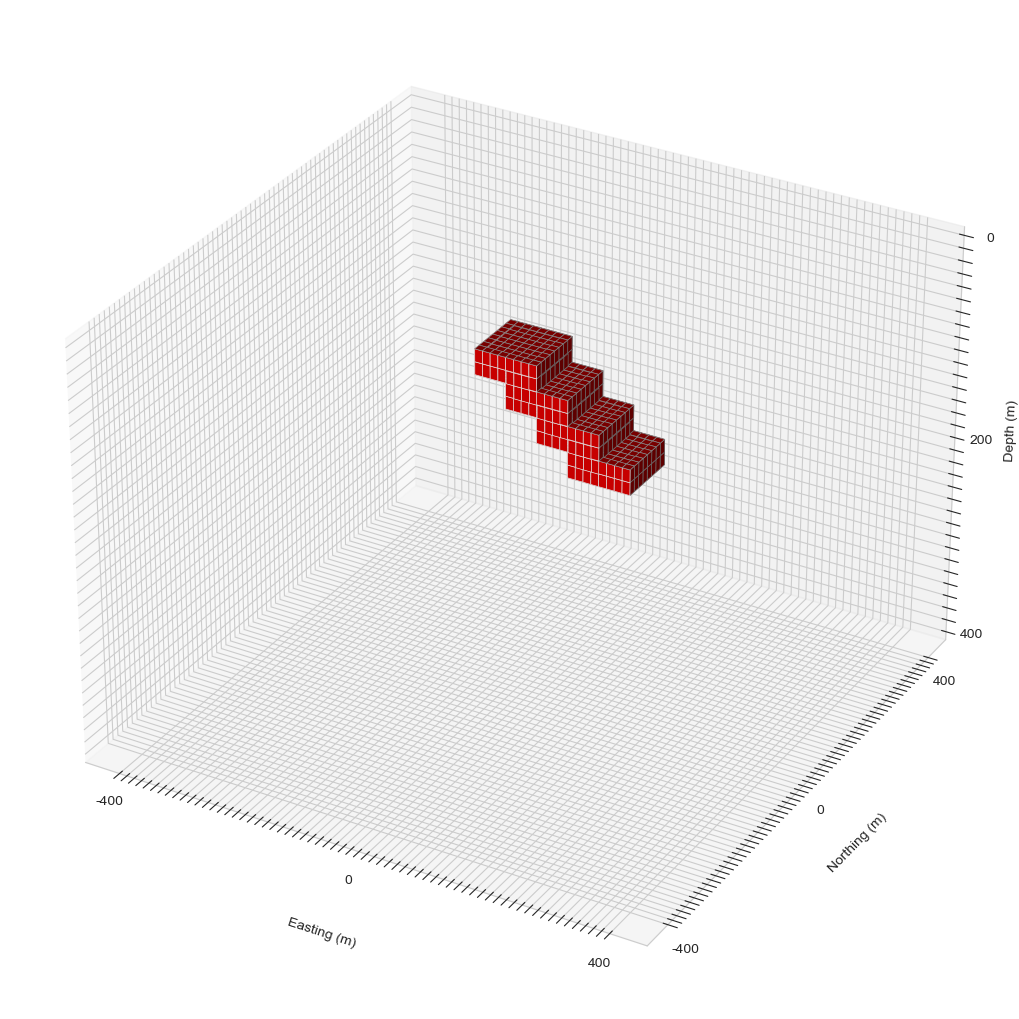

In [18]:
Model(np.transpose(y_test[3], (2, 0, 1)), 0.5)